# Network growth models pt 3


In [1]:
# Load some packages
import numpy as np
import matplotlib.pyplot as plt
import random 
from random import choices
import operator
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import poisson, binom, powerlaw,ks_2samp
import scipy.stats as stats

import import_ipynb

In [2]:
from FunzioniVarie import trianngles,degree,truncated_power_law

importing Jupyter notebook from FunzioniVarie.ipynb


## Accelerated growth model

In [3]:
def rew(n0 = 30,n=1000, r = 500, p =0.7,graph=True, seed=184937, info=True):
    'This is a growth model with rewiring of edges'
    if seed is not None:
        np.random.seed(seed)
        
    # generate the nodes positions in [0,1)x[0,1)
    x = np.random.rand(n0) # random array, elements in [0,1), length n
    y = np.random.rand(n0) # same....
    z = np.random.rand(n0)

    # connectivity should be such that all vertices are connected
    conn = np.array([16,28,14,25,20,16,12,1,27,19,15,2,21,11,4,9,24,27,8,3,23,22,0,29,18,6,5,13,7,10,26,17])
    np.random.shuffle(conn)

    conn_copy = conn
    
    if graph == True: 
        fig = plt.figure(figsize=(10,8))
        ax = Axes3D(fig)
            
        for j,k,l,i in zip(x,y,z,range(len(x))):
            ax.text(j,k,l,i)
            
        for i in range(len(x)):
            ax.plot([x[i],x[conn[i]]], [y[i],y[conn[i]]], [z[i],z[conn[i]]])
        ax.scatter(x, y, z, cmap='hsv')

        plt.show()
    
    for i in range(n):
        # create a random node
        #while True:
        new_x= np.random.rand()
        new_y= np.random.rand()
        new_z= np.random.rand()

        deg_1=degree(conn)
                    
        new_conn = np.random.choice(np.arange(len(conn))) # weighted choice (wrt to the degree of each node) among existing nodes
        
        x = np.append(x,new_x) #append the x coordinate of the new node
        y = np.append(y,new_y) #append the y coordinate of the new node
        z = np.append(z,new_z)
        conn = np.append(conn, new_conn) #append the existing node to which the new node will connect

        plt.clf()

    for k in range(r):
        prob = np.random.rand()

        if prob < p:
            # choose a random node
            #while True:
            new_x = np.random.choice(x)
            index = np.where(x==new_x)
            conn[index] = np.random.randint(n0+n) 
        else:
            # choose a random node
            #while True:
            new_x = np.random.choice(x)
            index = np.where(x==new_x)
   
            new_ind = conn[np.where(conn==conn[index])]
            conn[index] = np.random.choice(new_ind)    
            
    deg=degree(conn)

    if graph == True:  
        fig = plt.figure(figsize=(10,8))
        ax = Axes3D(fig)
            
        for j,k,l,i in zip(x,y,z,range(len(x))):
            ax.text(j,k,l,i)
            
        for i in range(len(x)):
            ax.plot([x[i],x[conn[i]]], [y[i],y[conn[i]]], [z[i],z[conn[i]]])
        ax.scatter(x, y, z, cmap='hsv')

        sns.set_style("white")
    if info== True: 
        fig = plt.figure(figsize=(10,6))
        sns.countplot(deg)
    
        plt.show()

    #index, value = max(enumerate(deg), key=operator.itemgetter(1))
    return deg

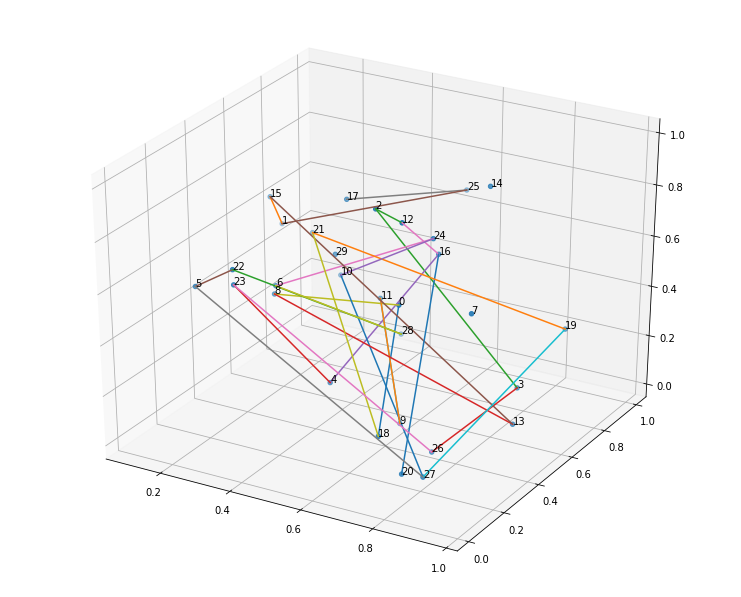

<Figure size 432x288 with 0 Axes>

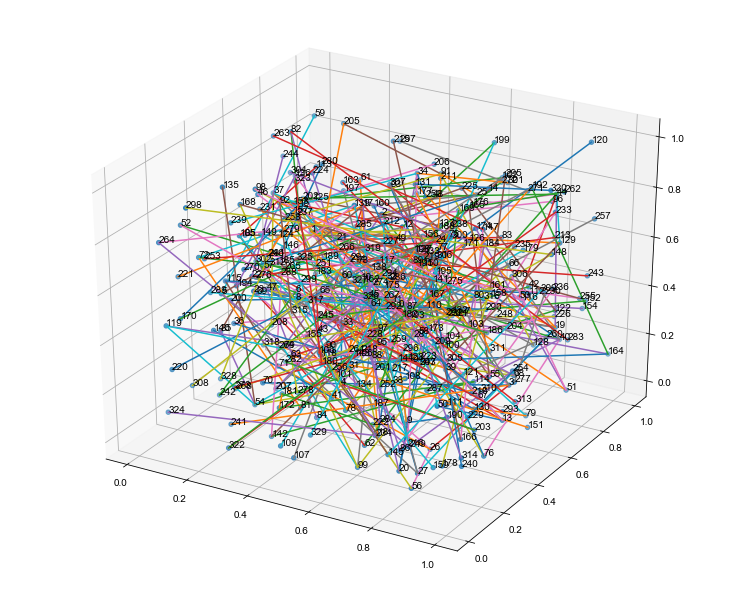

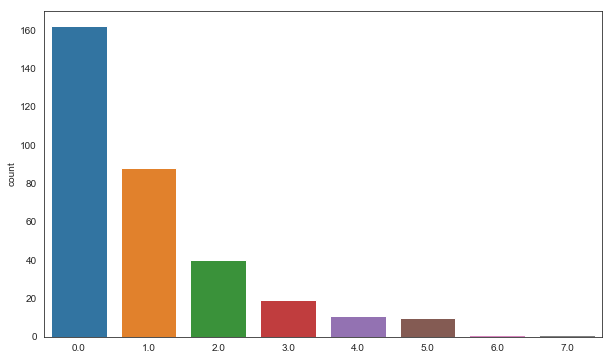

In [4]:
deg=rew(n=300, r=250, p=0.1)

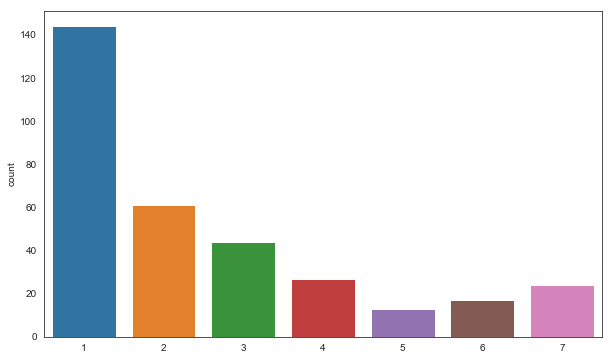

In [5]:
sample = truncated_power_law(1,7,330)
fig = plt.figure(figsize=(10,6))
sns.countplot(sample)
plt.show()

In [6]:
ks_2samp(sample,deg)

Ks_2sampResult(statistic=0.4879518072289157, pvalue=2.438453251387885e-35)

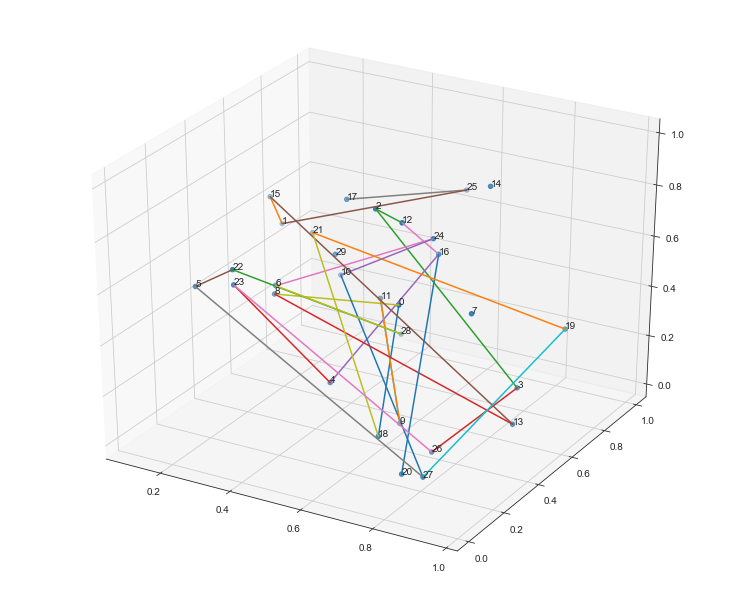

<Figure size 432x288 with 0 Axes>

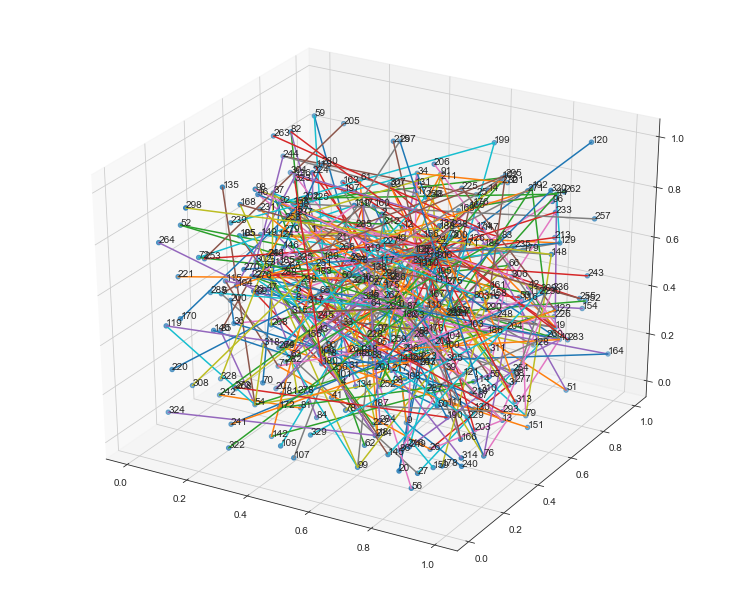

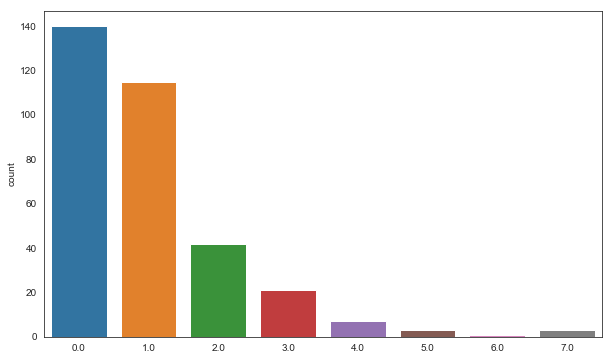

In [7]:
deg_2=rew(n=300,r=250,p=0.7)

In [8]:
ks_2samp(sample,deg_2)

Ks_2sampResult(statistic=0.42168674698795183, pvalue=1.682724581643245e-26)

<Figure size 432x288 with 0 Axes>

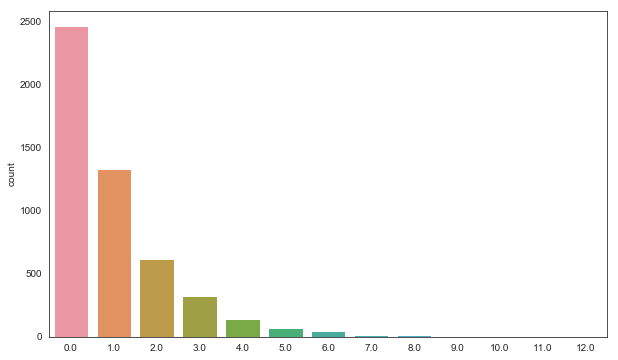

In [9]:
deg_3=rew(n0=30,n=5000, r=1500, p=0.1,graph=False)

<Figure size 432x288 with 0 Axes>

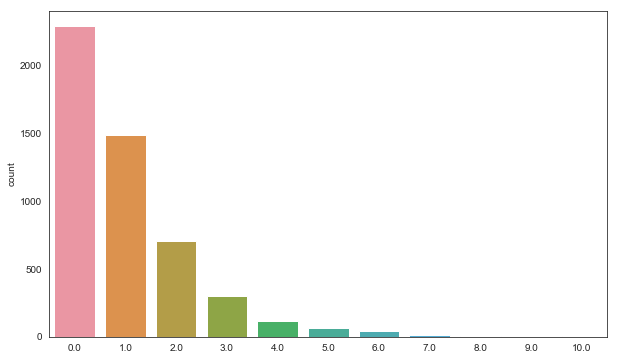

In [10]:
deg_4=rew(n0=30,n=5000, r=1500, p=0.7,graph=False)

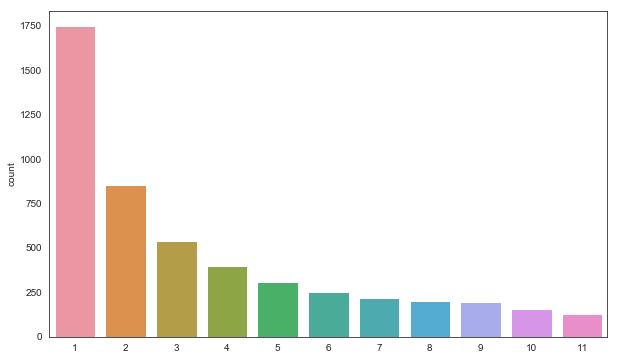

In [11]:
sample_2 = truncated_power_law(1,11,5000)
fig = plt.figure(figsize=(10,6))
sns.countplot(sample_2)
plt.show()

In [12]:
ks_2samp(sample_2,deg_3)

Ks_2sampResult(statistic=0.48926868044515104, pvalue=0.0)

In [ ]:
ks_2samp(sample_2,deg_4)

Ks_2sampResult(statistic=0.4548887122416534, pvalue=0.0)

In [ ]:
tot=0
total = 500
while total > 0:
    d= rew(n=5000, r=1500, p=0.1,graph=False,info=False)
    if ks_2samp(sample_2,d)[1]<=0.05:
        tot+=1
    total -=1

Print("Percentage of not rejected: {i}%".format(i=tot/500))

In [ ]:
tot=0
total = 500
while total > 0:
    d= rew(n=5000, r=1500, p=0.7,graph=False,info=False)
    if ks_2samp(sample_2,d)[1]<=0.05:
        tot+=1
    total -=1

Print("Percentage of not rejected: {i}%".format(i=tot/500))